<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#LG-beam-$LG_{p,m}(r,-\phi)$" data-toc-modified-id="LG-beam-$LG_{p,m}(r,-\phi)$-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LG beam $LG_{p,m}(r, \phi)$</a></span></li><li><span><a href="#VVB-on-a-Bloch-Sphere" data-toc-modified-id="VVB-on-a-Bloch-Sphere-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>VVB on a Bloch Sphere</a></span><ul class="toc-item"><li><span><a href="#$|\psi\rangle=\cos{\frac{\alpha}{2}}|R,m_1\rangle+-\sin{\frac{\alpha}{2&#10;}}e^{i-\beta}|L,m_2\rangle$" data-toc-modified-id="$|\psi\rangle=\cos{\frac{\alpha}{2}}|R,m_1\rangle+-\sin{\frac{\alpha}{2
}}e^{i-\beta}|L,m_2\rangle$-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>$|\psi\rangle=\cos{\frac{\alpha}{2}}|R,m_1\rangle+ \sin{\frac{\alpha}{2
}}e^{i \beta}|L,m_2\rangle$</a></span></li></ul></li></ul></div>

In [231]:
import os
import sys
import numpy as np
import pandas as pd
import scipy
import scipy.special
import itertools
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import collections
from collections import OrderedDict

import plotly
import plotly.offline
import plotly.graph_objs as go

if './src' not in sys.path:
    sys.path.append('./src')
import src.vector_vortex_beams as VVB
import utils
from src.utils import abs2, borderless_imshow_save, imshow_intensities

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Camera resolution
# camera_width = 1024
# camera_height = 768
camera_width = 300
camera_height = 300

Y, X = np.meshgrid(
    np.linspace(-camera_height / 2, camera_height / 2, num=camera_height),
    np.linspace(-camera_width / 2, camera_width / 2, num=camera_width)
)

reference_w0 = 50

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# LG beam $LG_{p,m}(r, \phi)$

Profiles for $p=0$ and $m=-5,-4,...,4,5$.

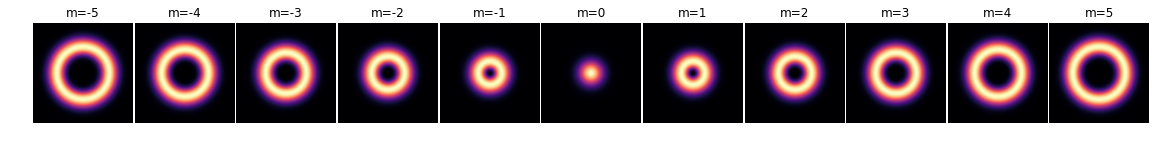

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(20, 6))
for ax, m in zip(axs, np.arange(-5, 6)):
    amps = VVB.LaguerreGauss(X, Y, p=0, m=m, w0=reference_w0)
    ax.axis('off'); ax.set_title('m={}'.format(m))
    utils.imshow_intensities(amps, ax=ax)
fig.subplots_adjust(hspace=0, wspace=.02)

Profiles for $p=1$ and $m=-5,-4,...,4,5$

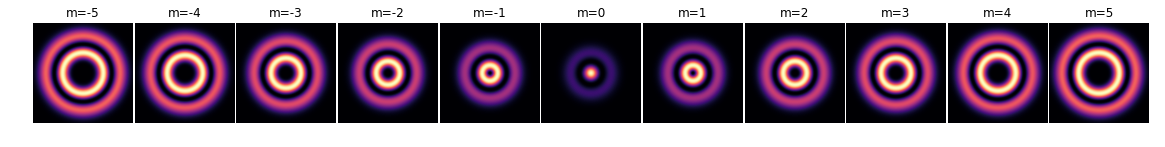

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(20, 6))
for ax, m in zip(axs, np.arange(-5, 6)):
    amps = VVB.LaguerreGauss(X, Y, p=1, m=m, w0=reference_w0)
    ax.axis('off'); ax.set_title('m={}'.format(m))
    utils.imshow_intensities(amps, ax=ax)
fig.subplots_adjust(hspace=0, wspace=.02)

Superpositions $\lvert 0\rangle+ \lvert m\rangle$ for $m=-4,...,4$:

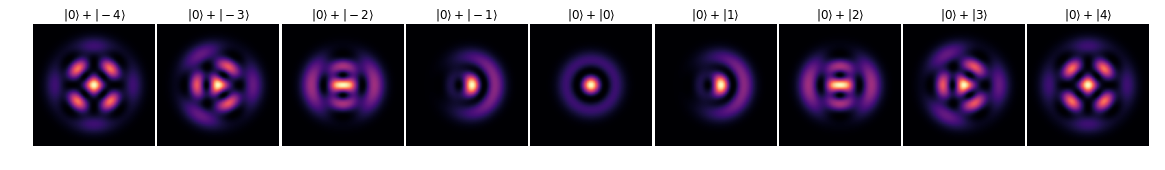

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(20, 6))
for ax, m in zip(axs, np.arange(-4, 5)):
    amps = VVB.LaguerreGauss(X, Y, p=1, m=0, w0=reference_w0) + VVB.LaguerreGauss(X, Y, p=1, m=m, w0=reference_w0)
    ax.axis('off'); ax.set_title(r'$| 0\rangle + | {}\rangle$'.format(m))
    utils.imshow_intensities(amps, ax=ax)
fig.subplots_adjust(hspace=0, wspace=.02)

Superpositions $\lvert 0\rangle+ i \lvert m\rangle$ for $m=-4,...,4$:

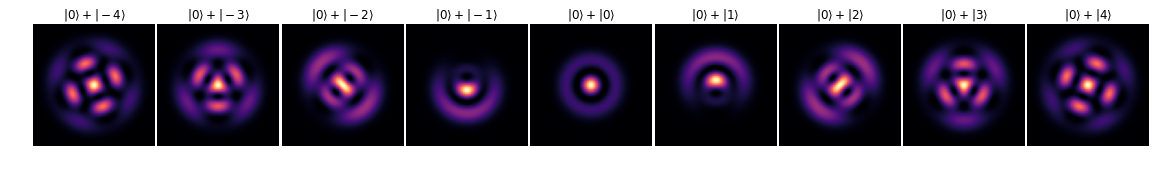

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=9, figsize=(20, 6))
for ax, m in zip(axs, np.arange(-4, 5)):
    amps = VVB.LaguerreGauss(X, Y, p=1, m=0, w0=reference_w0) + 1j * VVB.LaguerreGauss(X, Y, p=1, m=m, w0=reference_w0)
    ax.axis('off'); ax.set_title(r'$| 0\rangle + | {}\rangle$'.format(m))
    utils.imshow_intensities(amps, ax=ax)
fig.subplots_adjust(hspace=0, wspace=.02)

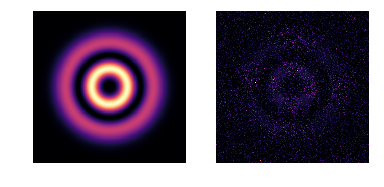

In [30]:
fig, axs = plt.subplots(ncols=2)

data = VVB.LaguerreGauss(X, Y, p=1, m=2, w0=reference_w0)
imshow_intensities(data, ax=axs[0])
data = utils.add_noise_to_array(data, noise_level=0.3)
imshow_intensities(data, ax=axs[1])

# Naive dimensionality reduction via PCA

In [201]:
def generate_batch_of_probabilities(p, m, w0=reference_w0, X=X, Y=Y, noise_level=0.1, sample_size=100, monitor=False):
    iterator = range(sample_size)
    if monitor:
        iterator = tqdm(iterator)
    data = np.zeros(shape=(sample_size, len(X) * len(Y)))
    for idx in iterator:
        if isinstance(m, (tuple, list)):
            amps = sum(VVB.LaguerreGauss(X, Y, p=p, m=m_, w0=reference_w0) for m_ in m)
        else:
            amps = VVB.LaguerreGauss(X, Y, p=p, m=m, w0=reference_w0)
        data[idx] = utils.add_noise_to_array(abs2(amps).flatten(), noise_level=noise_level)
    return data

def merge_dict_elements(dict_):
    data = None
    for key in list(dataset):
        if data is None:
            data = dataset[key]
        else:
            data = np.append(data, dataset[key], axis=0)
    return data

# import sklearn
# import sklearn.decomposition
# pca = sklearn.decomposition.PCA(n_components=3, svd_solver='randomized', whiten=True)
# pca.fit(data)

dataset = dict()
p_list = [0, 1, 2]
m_list = [0, 1, 2, 3, (0, 1), (0, 2), (1, 2)]
for p, m in tqdm(list(itertools.product(p_list, m_list))):
    name = 'p={}, m={}'.format(p, m)
    dataset[name] = generate_batch_of_probabilities(p=p, m=m, noise_level=0.2, sample_size=50)

import sklearn
import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=20, svd_solver='randomized', whiten=True)
pca.fit(merge_dict_elements(dataset))

100%|██████████| 21/21 [00:21<00:00,  1.28s/it]


PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=True)

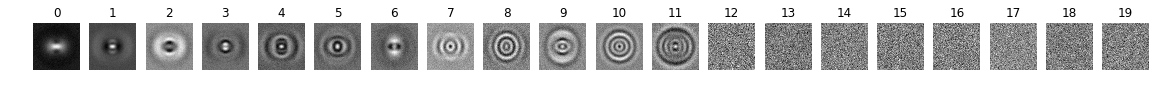

In [200]:
eigenbeams = pca.components_.reshape(pca.components_.shape[0], 300, 300)

fig, axs = plt.subplots(ncols=eigenbeams.shape[0], figsize=(20, 5))
for idx, ax in enumerate(axs):
    ax.imshow(eigenbeams[idx], cmap='gray')
    ax.axis('off')
    ax.set_title(str(idx))

In [198]:
pca.singular_values_

array([0.11425167, 0.07320407, 0.0610202 , 0.05043067, 0.04326235,
       0.04136676, 0.03534813, 0.03210652, 0.02961036, 0.0258944 ,
       0.0230528 , 0.02009286, 0.01717111, 0.01713464, 0.0170599 ,
       0.01703408, 0.01702156, 0.01698691, 0.01692598, 0.01686701])

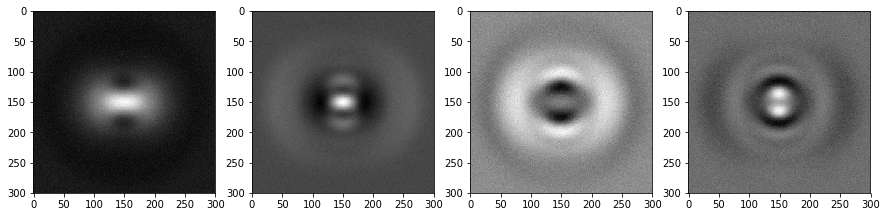

In [169]:
eigenbeams = pca.components_.reshape(pca.components_.shape[0], 300, 300)

fig, axs = plt.subplots(ncols=eigenbeams.shape[0], figsize=(15, 5))
for idx, ax in enumerate(axs):
    ax.imshow(eigenbeams[idx], cmap='gray')

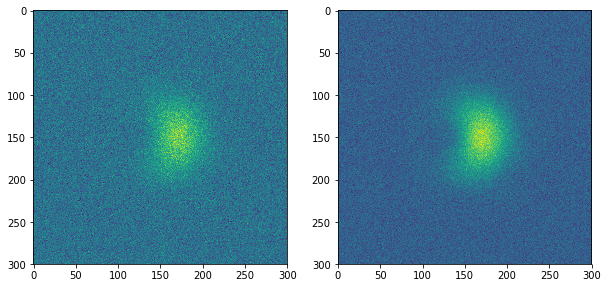

In [203]:
probs = dataset[list(dataset)[4]][20]
funneled_probs = pca.inverse_transform(pca.transform(probs[None, :]))

_, axs = plt.subplots(ncols=2, figsize=(10, 5))

axs[0].imshow(probs.reshape(300, 300))
axs[1].imshow(funneled_probs.reshape(300, 300))

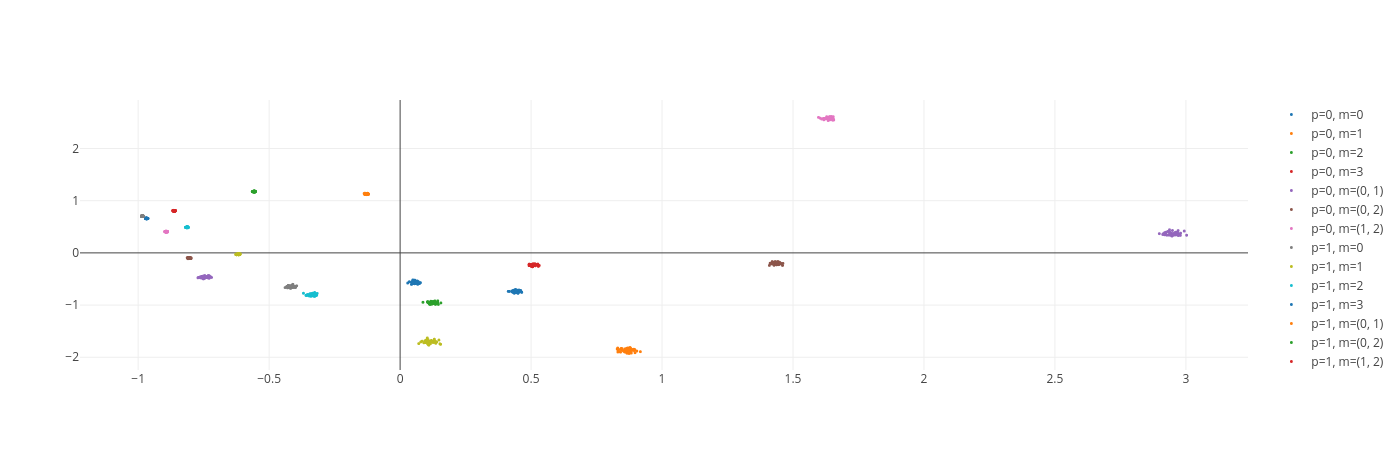

In [204]:
traces = []
for name, data in dataset.items():
    reduced_data = pca.transform(data)[:, :2]
    traces.append(go.Scatter(
        x=reduced_data[:, 0],
        y=reduced_data[:, 1],
#         z=reduced_data[:, 2],
        mode='markers',
        name=name,
        marker=dict(size=3)
    ))

plotly.offline.iplot(traces)

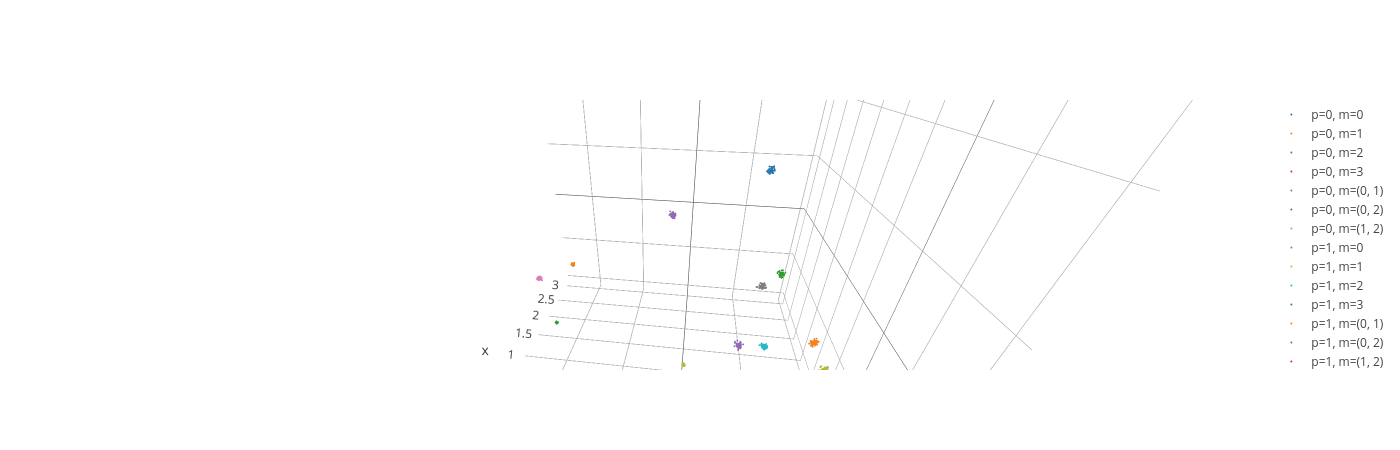

In [205]:
import plotly
import plotly.offline
import plotly.graph_objs as go

reduced_data = pca.transform(data)[:, :3]
colors = ['blue', 'red', 'green', 'purple']
traces = []
for name, data in dataset.items():
    reduced_data = pca.transform(data)
    traces.append(go.Scatter3d(
        x=reduced_data[:, 0],
        y=reduced_data[:, 1],
        z=reduced_data[:, 2],
        mode='markers',
        name=name,
        marker=dict(size=1)
    ))

plotly.offline.iplot(traces)

Generate a bunch of images for classification of different basis states

In [13]:
# import progressbar
# bar = progressbar.ProgressBar()
for m in np.arange(-5, 5 + 1):
    m_sign = '+'
    if m < 0:
        m_sign = '-'
    print('m: {}'.format(m))
    for idx in range(10):
        amps = VVB.LaguerreGauss(X, Y, p=1, m=m, w0=150)
        amps = utils.add_noise_to_array(amps, noise_level=0.2)
        name = 'VVB_p1m' + m_sign + str(abs(m))
        os.path.dirname
        path = './images/test/{}/{}({}).png'.format(name, name, idx)
        borderless_imshow_save(data=abs2(amps), outputname=path, imshow_opts=dict(cmap='gray'))

m: -5
m: -4
m: -3
m: -2
m: -1
m: 0
m: 1
m: 2
m: 3
m: 4
m: 5


# VVB generation and testing

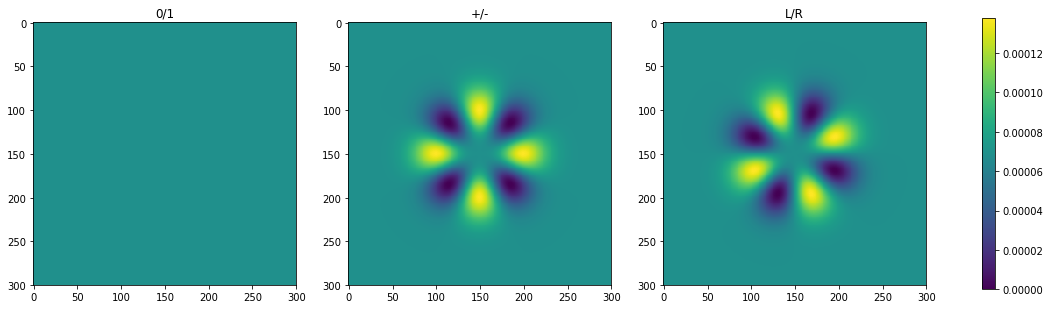

In [401]:
stokes_pars = VVB.vector_vortex_stokes_pars(X, Y, p=0, m_pair=[-2, 2], w0=reference_w0, polarization_state=[1, 1] / np.sqrt(2))
stokes_pars = stokes_pars + np.abs(stokes_pars.min())

fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
utils.imshow_stokes_probs(stokes_pars, axs=axs, imshow_opts=dict(vmin=stokes_pars.min(), vmax=stokes_pars.max()))
fig.colorbar(axs[1].images[0], ax=axs.ravel().tolist());

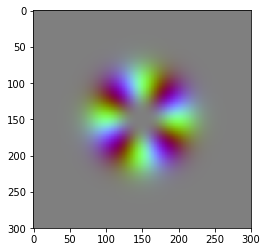

In [402]:
plt.imshow(utils.make_into_rgb_format(stokes_pars.transpose((1, 2, 0))));

In [410]:
# generate the tuples (p, (m1, m2)), with p fixed and (m1, m2) changing
p = 1
tuples_to_generate = []
m_list = [-5, -3, -1, 1, 3, 5]
for (m, n) in list(itertools.combinations_with_replacement(m_list, r=2)):
    if (p, (-m, -n)) not in tuples_to_generate:
        tuples_to_generate.append((p, (m, n)))

# actually generate, reduce, and classify the data
dataset = VVB.VVBDataset(X=X, Y=Y, w0=reference_w0)
dataset.generate_data(parameters=tuples_to_generate, num_samples=50, noise_level=0.01, polarization_state=[1, 1] / np.sqrt(2), monitor=True)
dataset.apply_PCA(n_components=10, svd_solver='randomized', whiten=True)
dataset.fit_SVM(gamma='scale')

100%|██████████| 18/18 [00:39<00:00,  2.16s/it]


In [412]:
dataset.reduce_and_classify(dataset.dataset[(1, (-5, -3))])

array(['(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))',
       '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))',
       '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))',
       '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))',
       '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))',
       '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))',
       '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))',
       '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))',
       '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))',
       '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))',
       '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))',
       '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))', '(1, (-5, -3))',
       '(1, (-5, -3))', '(1, (-5, -3))'], dtype='<U13')

In [418]:
[str(x) for x in list(dataset.dataset.keys())]

['(1, (-5, -5))',
 '(1, (-5, -3))',
 '(1, (-5, -1))',
 '(1, (-5, 1))',
 '(1, (-5, 3))',
 '(1, (-5, 5))',
 '(1, (-3, -3))',
 '(1, (-3, -1))',
 '(1, (-3, 1))',
 '(1, (-3, 3))',
 '(1, (-3, 5))',
 '(1, (-1, -1))',
 '(1, (-1, 1))',
 '(1, (-1, 3))',
 '(1, (-1, 5))',
 '(1, (1, 3))',
 '(1, (1, 5))',
 '(1, (3, 5))']

In [419]:
predicted_features = OrderedDict()
for test_label, test_data in dataset.dataset.items():
    predictions = dataset.reduce_and_classify(test_data)
    accuracies = [0] * len(dataset.labels_names)
    for label, count in collections.Counter(predictions).items():
        accuracies[label] = count
    predicted_features[class_name] = accuracies

_, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(
    data=list(predicted_features.values()), ax=ax,
    annot=True, square=True,
    xticklabels=predicted_features.keys(), yticklabels=predicted_features.keys()
);

TypeError: list indices must be integers or slices, not numpy.str_

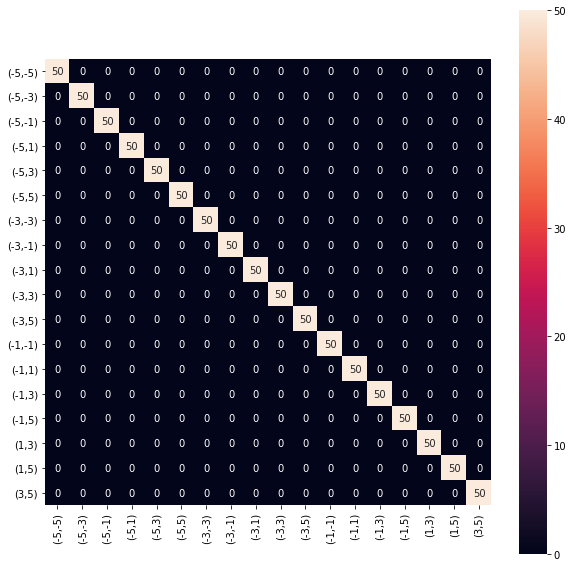

In [310]:
predicted_features = OrderedDict()
for class_name, class_elements in dataset.items():
    predictions = clf.predict(pca.transform(class_elements)[:, :20])
    accuracies = [0] * len(set(labels))
    for label, count in collections.Counter(predictions).items():
        accuracies[label] = count
    predicted_features[class_name] = accuracies

_, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(
    data=list(predicted_features.values()), ax=ax,
    annot=True, square=True, cmap=None,
    xticklabels=predicted_features.keys(), yticklabels=predicted_features.keys()
);

In [ ]:
utils.plot_stokes_probs_as_rbg(VVB.vector_vortex_stokes_pars(X, Y, p=1, m_pair=(1, 3), w0=reference_w0, polarization_state=[1, 1] / np.sqrt(2)));

utils.plot_stokes_probs_as_rbg(VVB.vector_vortex_stokes_pars(X, Y, p=1, m_pair=(-3, -1), w0=reference_w0, polarization_state=[1, 1] / np.sqrt(2)));

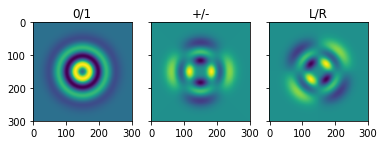

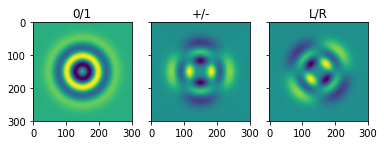

In [179]:
utils.imshow_stokes_probs(VVB.vector_vortex_stokes_pars(X, Y, p=1, m_pair=(1, 3), w0=reference_w0, polarization_state=[1, 1] / np.sqrt(2)))

utils.imshow_stokes_probs(VVB.vector_vortex_stokes_pars(X, Y, p=1, m_pair=(-3, -1), w0=reference_w0, polarization_state=[1, 1] / np.sqrt(2)));

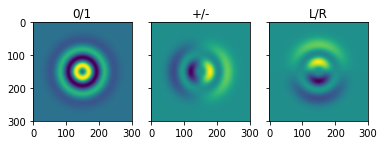

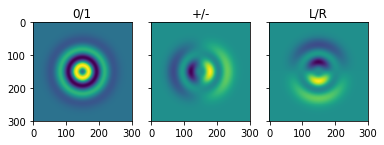

In [178]:
utils.imshow_stokes_probs(VVB.vector_vortex_stokes_pars(X, Y, p=1, m_pair=(1, 2), w0=reference_w0, polarization_state=[1, 1] / np.sqrt(2)))

utils.imshow_stokes_probs(VVB.vector_vortex_stokes_pars(X, Y, p=1, m_pair=(-1, -2), w0=reference_w0, polarization_state=[1, 1] / np.sqrt(2)));

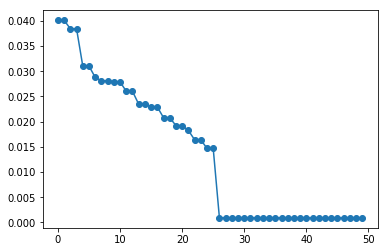

In [196]:
plt.plot(pca.singular_values_, '-o')

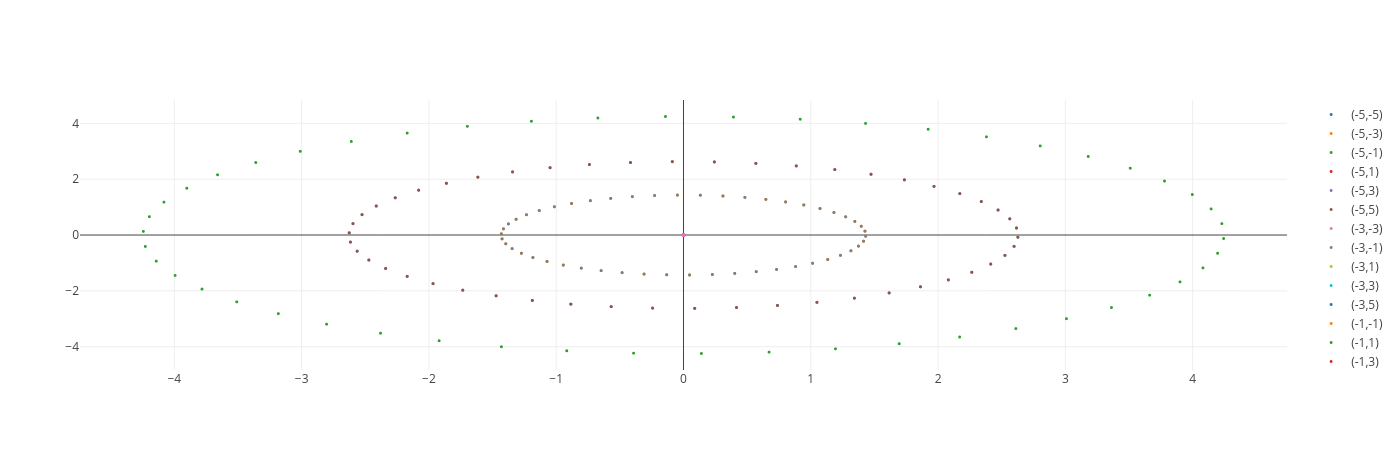

In [197]:
traces = []
for name, data in dataset.items():
    reduced_data = pca.transform(data)[:, :2]
    traces.append(go.Scatter(
        x=reduced_data[:, 0],
        y=reduced_data[:, 1],
#         z=reduced_data[:, 2],
        mode='markers',
        name=name,
        marker=dict(size=3)
    ))

plotly.offline.iplot(traces)

In [198]:
import plotly
import plotly.offline
import plotly.graph_objs as go

reduced_data = pca.transform(data)[:, :3]
colors = ['blue', 'red', 'green', 'purple']
traces = []
for name, data in dataset.items():
    reduced_data = pca.transform(data)
    traces.append(go.Scatter3d(
        x=reduced_data[:, 0],
        y=reduced_data[:, 1],
        z=reduced_data[:, 2],
        mode='markers',
        name=name,
        marker=dict(size=2)
    ))

plotly.offline.plot(traces, filename='stargate.html')

'file:///home/lk/Documents/docs/research/OAM_2016/CNN-for-VVB/stargate.html'

# Taira stuff

In [15]:
#projectors for stokes measurements


sV_op = np.dot(rotated_HWP_matrix(45), rotated_QWP_matrix(0))
sH_op = np.dot(rotated_HWP_matrix(0), rotated_QWP_matrix(0))
sD_op = np.dot(rotated_HWP_matrix(22.5), rotated_QWP_matrix(45))
sA_op = np.dot(rotated_HWP_matrix(-22.5), rotated_QWP_matrix(45))
sL_op = np.dot(rotated_HWP_matrix(22.5), rotated_QWP_matrix(0))
sR_op = np.dot(rotated_HWP_matrix(-22.5), rotated_QWP_matrix(0))

# #polarization states
# L = [1, -1j] / np.sqrt(2)
# R = [1, 1j] / np.sqrt(2)
# D = [1, 1] / np.sqrt(2)
# A = [1, -1] / np.sqrt(2)
# H = np.array([1, 0])
# V = np.array([0, 1])


def pol_state(state1, state2, beta, alpha): 
    return np.array([
        np.cos(np.radians(alpha / 2)) * state1,
        np.exp(1j * np.radians(beta)) * np.sin(np.radians(alpha / 2)) * state2
    ])


def rotate_state(rotation_matrix, state):
    return np.dot(rotation_matrix, np.transpose(state))


def vec_vortex(coeff,x,y,p,m1,m2,w0):
    return np.round(coeff[0],6)*LG(x,y,p,m2,w0)+np.round(coeff[1],6)*LG(x,y,p,m1,w0)


def stokes_para(Iv,Ih):
    return Ih - Iv

In [ ]:
#VVB generation with LG
w0=150
m1=-5
m2=1
beta=0
alpha=90

v_mes = measurement(sV_op, pol_state(L, R, beta, alpha))[0]
h_mes = measurement(sH_op, pol_state(L, R, beta, alpha))[0]
d_mes = measurement(sD_op, pol_state(L, R, beta, alpha))[0]
a_mes = measurement(sA_op, pol_state(L, R, beta, alpha))[0]
l_mes = measurement(sL_op, pol_state(L, R, beta, alpha))[0]
r_mes = measurement(sR_op, pol_state(L, R, beta, alpha))[0]

v_vortex = vec_vortex(v_mes, X, Y, 0, m1, m2, w0)
h_vortex = vec_vortex(h_mes, X, Y, 0, m1, m2, w0)
d_vortex = vec_vortex(d_mes, X, Y, 0, m1, m2, w0)
a_vortex = vec_vortex(a_mes, X, Y, 0, m1, m2, w0)
l_vortex = vec_vortex(l_mes, X, Y, 0, m1, m2, w0)
r_vortex = vec_vortex(r_mes, X, Y, 0, m1, m2, w0)

Iv = np.abs(np.transpose(v_vortex))**2
Ih = np.abs(np.transpose(h_vortex))**2
Id = np.abs(np.transpose(d_vortex))**2
Ia = np.abs(np.transpose(a_vortex))**2
Il = np.abs(np.transpose(l_vortex))**2
Ir = np.abs(np.transpose(r_vortex))**2


s1 = stokes_para(Ih, Iv)
s2 = stokes_para(Id, Ia)
s3 = stokes_para(Il, Ir)
s_vector = np.dstack((s1, s2, s3))

In [ ]:
#Checking beam shapes on each polarization basis
fig, axs = plt.subplots(nrows=1, ncols=6)
beams = [Ih, Iv, Id, Ia, Il, Ir]
bases = ['H', 'V', 'D', 'A', 'L', 'R']
c=0
for ax, beam, label in zip(axs, beams, bases):
    ax.imshow(beam, interpolation='nearest', cmap='inferno')
    ax.axis('off')
    ax.set_title(label)

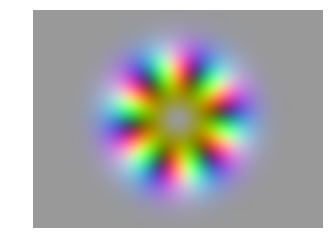

In [ ]:
#Polarization patterns econding in RGB colors

stokes=s_vector+np.abs(np.min(s_vector))
#la formula qui sopra mi serve perchè i parametri di Stokes possono essere negativi
#e nella conversione in un colore RGB dà fastidio.
#Quello che faccio è traslare il centro della sfera di Bloch da (0,0,0) a (1,1,1)
#Con le immagini teoriche ho problemi a calcolarmi i parametri di Stokes normalizzati (esplode
#quando deve fare 0/0), infatti la funzione stokes-para non ha il denominatore, e per
#questo traslo di np.abs(np.min(s_vector)) e non di 1 come faccio durante le acquisizioni
#dall'apparato (lì la camera ha un fondo !=0 e non capita mai una divisione 0/0 e 
#riesco ad ottenere i parametri normalizzati). Quesa cosa comunque funziona molto bene, 
#tranne che in prossimità
#dei poli in cui questo codice va un po' adattato ai casi.


rescaled=(256/(np.max(stokes))*(stokes)).astype(np.uint8)

plt.imshow(rescaled,interpolation='nearest')
plt.axis('off')
plt.show()